<a href="https://colab.research.google.com/github/AlanaVieira/dados-ies/blob/main/mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Styling notebook
from IPython.display import display, HTML
def css_styling():
    styles = open("/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [ ]:
from IPython.display import display, HTML
display(HTML('<style>.container {width: 100% !important}</style>'))

# Inicio

In [ ]:
# <span style="border:1px solid blue;background-color:yellow;color:blue;font-family:Courier;font-size:1.0em"> Inicio </span>

## Links uteis

- Cores em graficos plotly: https://plotly.com/python/discrete-color/
- https://www.selecolor.com/en/recommended-color-palette/

## Importação de libs

In [ ]:
# para ler arquivo excel (xls)
# conda install -c anaconda xlrd

import datetime
from datetime import datetime
import os

# Analise
import pandas as pd
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

#mapa
import geobr
import geopandas as gpd

#para salvar as figuras
import pickle

## Configurações

In [ ]:
# para habilitar rolagem horizontal do dataframe
# caso não funcione no Firefox
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

In [ ]:
# formatação de mensagens de print
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
#print(color.BOLD + 'Hello World !' + color.END)

## Parâmetros

In [ ]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('max_colwidth', 1000) # tamanho das colunas para exibição do conteúdo de textos longos

np.set_printoptions(threshold=1000)

# Formatar numeros float (2 casas decimais)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Formatações para gráficos
sns.set(style="darkgrid") #cor da area dos plots
figsize = (10,10)

# Definição de funções

## checar_df

Para um determinado dataframe, são verificados:
- total de registros;
- quantidade e tipos de colunas;
- quantidade de valores únicos;
- quantidade de valores nulos (para identificar a necessidade de pre processamento dos dados).

In [ ]:
def checar_df(df):
    print(color.BOLD  + color.RED + 'Informações do dataframe: ' + color.END)
    df.info()

    print(color.BOLD + color.RED + "\nNúmero de observacoes na base de dados: " + color.END, df.shape[0])
    print('Total de ', df.shape[1], 'Colunas: ', df.columns.values.tolist())

    print(color.BOLD + color.RED + "\nNúmero de valores unicos (Não inclui NaN): " + color.END)
    display(df.nunique(dropna=True).to_frame(name='Contagem Unicos').sort_index())

    print(color.BOLD + color.RED + "Número de valores nulos:" + color.END)
    display(df.isnull().sum().sort_values(ascending=False).to_frame(name='Contagem Nulos').sort_index())

## define_nome_regiao

In [ ]:
def define_nome_regiao(x):
    if x == 'NE':   return 'Nordeste'
    elif x == 'SE': return 'Sudeste'
    elif x == 'S': return 'Sul'
    elif x == 'CO': return 'Centro-Oeste'
    elif x == 'N': return 'Norte'
    else: return 'não informado'

## insere_info_regiao

In [ ]:
# insere Nome Regiao em dataframes com informação de UF
def insere_info_regiao(x):
    if x=='AC': return 'Norte'
    if x=='AL': return 'Nordeste'
    if x=='AP': return 'Norte'
    if x=='AM': return 'Norte'
    if x=='BA': return 'Nordeste'
    if x=='CE': return 'Nordeste'
    if x=='DF': return 'Centro-Oeste'
    if x=='ES': return 'Sudeste'
    if x=='GO': return 'Centro-Oeste'
    if x=='MA': return 'Nordeste'
    if x=='MT': return 'Centro-Oeste'
    if x=='MS': return 'Centro-Oeste'
    if x=='MG': return 'Sudeste'
    if x=='PR': return 'Sul'
    if x=='PB': return 'Nordeste'
    if x=='PA': return 'Norte'
    if x=='PE': return 'Nordeste'
    if x=='PI': return 'Nordeste'
    if x=='RN': return 'Nordeste'
    if x=='RS': return 'Sul'
    if x=='RJ': return 'Sudeste'
    if x=='RO': return 'Norte'
    if x=='RR': return 'Norte'
    if x=='SC': return 'Sul'
    if x=='SE': return 'Nordeste'
    if x=='SP': return 'Sudeste'
    if x=='TO': return 'Norte'
    else: return 'sem informação'

## define_tp_cat_adm

In [ ]:
def define_tp_cat_adm(x):
    if x == 1:   return 'Pública Federal'
    elif x == 2: return 'Pública Estadual'
    elif x == 3: return 'Pública Municipal'
    elif x == 4: return 'Privada com fins lucrativos'
    elif x == 5: return 'Privada sem fins lucrativos'
    elif x == 6: return 'Privada - Particular em sentido estrito'
    elif x == 7: return 'Especial'
    elif x == 8: return 'Privada comunitária'
    elif x == 9: return 'Privada confessional'
    else: return 'não informado'

## define_tp_org_acad

In [ ]:
def define_tp_org_acad(x):
    if x == 1: return 'Universidade'
    elif x == 2: return 'Centro Universitário'
    elif x == 3: return 'Faculdade'
    elif x == 4: return 'Instituto Federal de Educação, Ciência e Tecnologia'
    elif x == 5: return 'Centro Federal de Educação Tecnológica'
    else: return 'não informado'

## define_tp_org_principal

In [ ]:
def define_tp_org_principal(x):
    if x == 1: return 'Faculdade'               #'Universidade'
    elif x == 2: return 'Centro Universitário'  #'Centro Universitário'
    elif x == 3: return 'Faculdade'             #'Faculdade'
    elif x == 4: return 'Outros'  # 'Instituto Federal de Educação, Ciência e Tecnologia'
    elif x == 5: return  'Outros' #'Centro Federal de Educação Tecnológica'
    else: return 'não informado'

# Carga dos Dados

## Carga dados IBGE

Dados do IBGE se encontram em 3 csvs - portanto, ambos serão carregados em diferentes dataframes para depois terem algumas colunas de interesse serem adicionadas ao dataframe principal (df_ies).

In [ ]:
# definir os tipos de algumas colunas
# para facilitar operações de merge
list_col_string = ['COD_IBGE','COD_SIAFI','COD_UE_TSE_2016','CAPITAL']
dict_dtype = {column : 'str'  for column in list_col_string}

ibge1 = pd.read_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/IBGE/ibge.csv', sep=';', dtype = dict_dtype, low_memory=False)

# renomear colunas
ibge1 = ibge1.rename(columns = {'POP2013':'POP_IBGE_2013'})

ibge1.info()
ibge1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COD_IBGE           5570 non-null   object 
 1   COD_SIAFI          5569 non-null   object 
 2   NOME_MUNICIPIO     5570 non-null   object 
 3   Nome_Simplificado  5570 non-null   object 
 4   SIGLA_UF           5570 non-null   object 
 5   NOME_UF            5570 non-null   object 
 6   LAT                5570 non-null   float64
 7   LNG                5570 non-null   float64
 8   POP_IBGE_2013      5570 non-null   int64  
 9   CAPITAL            5570 non-null   object 
 10  ALT                5570 non-null   float64
 11  REGIAO             5570 non-null   object 
 12  COD_UE_TSE_2016    5568 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 565.8+ KB


COD_IBGE COD_SIAFI         NOME_MUNICIPIO     Nome_Simplificado SIGLA_UF  \
0  1100015      0033  Alta Floresta D'Oeste  ALTA FLORESTA DOESTE       RO   
1  1100023      0007              Ariquemes             ARIQUEMES       RO   
2  1100031      0037                 Cabixi                CABIXI       RO   
3  1100049      0009                 Cacoal                CACOAL       RO   
4  1100056      0027             Cerejeiras            CEREJEIRAS       RO   

    NOME_UF    LAT    LNG  POP_IBGE_2013 CAPITAL    ALT REGIAO COD_UE_TSE_2016  
0  Rondônia -11.94 -62.00          25728       0 337.74      N           00310  
1  Rondônia  -9.91 -63.03         101269       0 138.69      N           00078  
2  Rondônia -13.50 -60.54           6495       0 236.06      N           00450  
3  Rondônia -11.43 -61.44          85863       0 177.45      N           00094  
4  Rondônia -13.20 -60.82          18041       0 262.81      N           00272

In [ ]:
# definir os tipos de algumas colunas
list_col_string = ['COD_IBGE','COD. UF','COD. MUNIC']
dict_dtype = {column : 'str'  for column in list_col_string}

# dados atualizados de População (Censo 2022)
ibge2 = pd.read_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/IBGE/POP2022_Municipios_20230622.csv',
                    sep='|',
                    encoding='iso-8859-1',
                    dtype = dict_dtype,
                    low_memory=False)

# renomear colunas
ibge2 = ibge2.rename(columns = {'POPULAÇÃO':'POP_IBGE_2022'})

# converter para int
ibge2['POP_IBGE_2022'] = ibge2['POP_IBGE_2022'].astype(int)

ibge2.info()
ibge2.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF                 5570 non-null   object
 1   COD. UF            5570 non-null   object
 2   COD. MUNIC         5570 non-null   object
 3   COD_IBGE           5570 non-null   object
 4   NOME DO MUNICÍPIO  5570 non-null   object
 5   POP_IBGE_2022      5570 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 261.2+ KB


UF COD. UF COD. MUNIC COD_IBGE      NOME DO MUNICÍPIO  POP_IBGE_2022
0  RO      11      00015  1100015  Alta Floresta D'Oeste          21558
1  RO      11      00023  1100023              Ariquemes         100896
2  RO      11      00031  1100031                 Cabixi           5107
3  RO      11      00049  1100049                 Cacoal          92202
4  RO      11      00056  1100056             Cerejeiras          15237

In [ ]:
# Consolida df do IBGE
col_interesse1 = ['REGIAO', 'SIGLA_UF', 'NOME_UF', 'COD_IBGE', 'NOME_MUNICIPIO', 'LAT', 'LNG', 'POP_IBGE_2013', 'CAPITAL']
col_interesse2 = ['COD_IBGE', 'POP_IBGE_2022']
ibge3 = pd.merge(ibge1[col_interesse1],
                ibge2[col_interesse2],
                how='inner',
                left_on = 'COD_IBGE',
                right_on = 'COD_IBGE',
                indicator=True)

display(ibge3['_merge'].value_counts()) # para assegurar que todos os dados foram preenchidos

cols_delete = ['_merge']
for c in cols_delete:
    del ibge3[c]

# Incluir Nome da Regiao
ibge3.insert(ibge3.columns.get_loc('REGIAO')+1, \
                'NOME_REGIAO', ibge3['REGIAO'].apply(lambda x: define_nome_regiao(x)))

print('\nTotal de registros do ibge: ', ibge3.shape[0])
display(ibge3.head(5))

both          5570
left_only        0
right_only       0
Name: _merge, dtype: int64


Total de registros do ibge:  5570


REGIAO NOME_REGIAO SIGLA_UF   NOME_UF COD_IBGE         NOME_MUNICIPIO  \
0      N       Norte       RO  Rondônia  1100015  Alta Floresta D'Oeste   
1      N       Norte       RO  Rondônia  1100023              Ariquemes   
2      N       Norte       RO  Rondônia  1100031                 Cabixi   
3      N       Norte       RO  Rondônia  1100049                 Cacoal   
4      N       Norte       RO  Rondônia  1100056             Cerejeiras   

     LAT    LNG  POP_IBGE_2013 CAPITAL  POP_IBGE_2022  
0 -11.94 -62.00          25728       0          21558  
1  -9.91 -63.03         101269       0         100896  
2 -13.50 -60.54           6495       0           5107  
3 -11.43 -61.44          85863       0          92202  
4 -13.20 -60.82          18041       0          15237

In [ ]:
# para checar um municipio específico
# ibge[ibge['NOME_MUNICIPIO']=='Brasília']

## Carga dados IBGE - Regioes

Carga de csv com as meso e microrregiões.

- UF
- Nome_UF
- Cod_RG_Intermediaria
- Nome_RG_Intermediaria
- Cod_RG_Imediata
- Nome_RG_Imediata
- Cod_Mesorregiao
- Nome_Mesorregiao
- Cod_Microrregiao
- Nome_Microrregiao
- Cod_Mun
- Cod_IBGE
- Nome_Mun


In [ ]:
# definir os tipos de algumas colunas
list_col_string = ['Cod_IBGE', 'Cod_Mesorregiao', 'Cod_Microrregiao']
dict_dtype = {column : 'str'  for column in list_col_string}

# dados atualizados de População (Censo 2022)
ibge_com_regioes = pd.read_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/IBGE/regioes_brasil.csv',
                    sep='|',
                    encoding='iso-8859-1',
                    dtype = dict_dtype,
                    low_memory=False)

# trazer apenas colunas de interesse
ibge_com_regioes_res = ibge_com_regioes[['UF', 'Nome_UF', 'Cod_IBGE', 'Nome_Mun',
                             'Cod_Mesorregiao', 'Nome_Mesorregiao',
                             'Cod_Microrregiao','Nome_Microrregiao']]
ibge_com_regioes_res.head()

UF   Nome_UF Cod_IBGE                 Nome_Mun Cod_Mesorregiao  \
0  11  Rondônia  1100015    Alta Floresta D'Oeste              02   
1  11  Rondônia  1100379  Alto Alegre dos Parecis              02   
2  11  Rondônia  1100403             Alto Paraíso              02   
3  11  Rondônia  1100346         Alvorada D'Oeste              02   
4  11  Rondônia  1100023                Ariquemes              02   

    Nome_Mesorregiao Cod_Microrregiao Nome_Microrregiao  
0  Leste Rondoniense              006            Cacoal  
1  Leste Rondoniense              006            Cacoal  
2  Leste Rondoniense              003         Ariquemes  
3  Leste Rondoniense              005  Alvorada D'Oeste  
4  Leste Rondoniense              003         Ariquemes

## Consolidar todos os dados IBGE

In [ ]:
# Consolida df do IBGE com as Regioes
col_interesse = ['Cod_IBGE', 'Cod_Mesorregiao', 'Nome_Mesorregiao','Cod_Microrregiao','Nome_Microrregiao']

ibge = pd.merge(ibge3,
                ibge_com_regioes_res[col_interesse],
                how='inner',
                left_on = 'COD_IBGE',
                right_on = 'Cod_IBGE',
                indicator=True)

display(ibge['_merge'].value_counts()) # para assegurar que todos os dados foram preenchidos

cols_delete = ['_merge','Cod_IBGE']
for c in cols_delete:
    del ibge[c]

print('\nTotal de colunas do ibge: ', ibge.shape[1])
print('Total de registros do ibge: ', ibge.shape[0])
display(ibge.head(5))

both          5570
left_only        0
right_only       0
Name: _merge, dtype: int64


Total de colunas do ibge:  15
Total de registros do ibge:  5570


REGIAO NOME_REGIAO SIGLA_UF   NOME_UF COD_IBGE         NOME_MUNICIPIO  \
0      N       Norte       RO  Rondônia  1100015  Alta Floresta D'Oeste   
1      N       Norte       RO  Rondônia  1100023              Ariquemes   
2      N       Norte       RO  Rondônia  1100031                 Cabixi   
3      N       Norte       RO  Rondônia  1100049                 Cacoal   
4      N       Norte       RO  Rondônia  1100056             Cerejeiras   

     LAT    LNG  POP_IBGE_2013 CAPITAL  POP_IBGE_2022 Cod_Mesorregiao  \
0 -11.94 -62.00          25728       0          21558              02   
1  -9.91 -63.03         101269       0         100896              02   
2 -13.50 -60.54           6495       0           5107              02   
3 -11.43 -61.44          85863       0          92202              02   
4 -13.20 -60.82          18041       0          15237              02   

    Nome_Mesorregiao Cod_Microrregiao  Nome_Microrregiao  
0  Leste Rondoniense              006             Cacoal  
1  Leste Rondoniense              003          Ariquemes  
2  Leste Rondoniense              008  Colorado do Oeste  
3  Leste Rondoniense              006             Cacoal  
4  Leste Rondoniense              008  Colorado do Oeste

In [ ]:
ibge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REGIAO             5570 non-null   object 
 1   NOME_REGIAO        5570 non-null   object 
 2   SIGLA_UF           5570 non-null   object 
 3   NOME_UF            5570 non-null   object 
 4   COD_IBGE           5570 non-null   object 
 5   NOME_MUNICIPIO     5570 non-null   object 
 6   LAT                5570 non-null   float64
 7   LNG                5570 non-null   float64
 8   POP_IBGE_2013      5570 non-null   int64  
 9   CAPITAL            5570 non-null   object 
 10  POP_IBGE_2022      5570 non-null   int64  
 11  Cod_Mesorregiao    5570 non-null   object 
 12  Nome_Mesorregiao   5570 non-null   object 
 13  Cod_Microrregiao   5570 non-null   object 
 14  Nome_Microrregiao  5570 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 696.2+ KB


### Salvar dados IBGE consolidados em CSV

In [ ]:
# salvar em arquivo
#ibge.to_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/preparados/dados_ibge_consolidado.csv', sep='|', index=False)

## Agrupar População e Qtd de Municipios por Estado

In [ ]:
ibge_uf = ibge.groupby(['REGIAO','NOME_REGIAO','SIGLA_UF','NOME_UF']).agg({'POP_IBGE_2022':'sum',
                                                    'COD_IBGE':'count',
                                                    'Nome_Mesorregiao': 'nunique',
                                                    'Nome_Microrregiao': 'nunique'})
ibge_uf = ibge_uf.reset_index().rename(columns={'POP_IBGE_2022':'Total_Pop_IBGE_2022',
                                                'COD_IBGE':'Total_Mun_IBGE_2022',
                                                'Nome_Mesorregiao':'Total_Meso',
                                                'Nome_Microrregiao':'Total_Micro'})
ibge_uf.head()

REGIAO   NOME_REGIAO SIGLA_UF             NOME_UF  Total_Pop_IBGE_2022  \
0     CO  Centro-Oeste       DF    Distrito Federal              2923369   
1     CO  Centro-Oeste       GO               Goiás              6950976   
2     CO  Centro-Oeste       MS  Mato Grosso do Sul              2833742   
3     CO  Centro-Oeste       MT         Mato Grosso              3784239   
4      N         Norte       AC                Acre               829780   

   Total_Mun_IBGE_2022  Total_Meso  Total_Micro  
0                    1           1            1  
1                  246           5           18  
2                   79           4           11  
3                  141           5           22  
4                   22           2            5

In [ ]:
# salvar CSV
#ibge_uf.to_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/preparados/dados_ibge_agg_uf.csv', sep='|', index=False)

## Agrupar População e Qtd de Municipios por Regiao

In [ ]:
ibge_regiao = ibge.groupby(['REGIAO','NOME_REGIAO']).agg({'POP_IBGE_2022':'sum',
                                                          'COD_IBGE':'count',
                                                          'SIGLA_UF':'nunique',
                                                          'Nome_Mesorregiao': 'nunique',
                                                          'Nome_Microrregiao': 'nunique'})
ibge_regiao = ibge_regiao.reset_index().rename(columns={'POP_IBGE_2022':'Total_Pop_IBGE_2022',
                                                        'COD_IBGE':'Total_Mun_IBGE_2022',
                                                        'SIGLA_UF':'Total_UF',
                                                        'Nome_Mesorregiao':'Total_Meso',
                                                        'Nome_Microrregiao':'Total_Micro'})
ibge_regiao.head()

REGIAO   NOME_REGIAO  Total_Pop_IBGE_2022  Total_Mun_IBGE_2022  Total_UF  \
0     CO  Centro-Oeste             16492326                  467         4   
1      N         Norte             17834762                  450         7   
2     NE      Nordeste             55389382                 1794         9   
3      S           Sul             30685598                 1191         3   
4     SE       Sudeste             87348223                 1668         4   

   Total_Meso  Total_Micro  
0          15           52  
1          20           64  
2          42          187  
3          23           94  
4          37          160

In [ ]:
# salvar CSV
#ibge_regiao.to_csv('./dados/preparados/dados_ibge_agg_regiao.csv', sep='|', index=False)

## Agrupar População e Qtd de Municipios por MesoRegiao

In [ ]:
ibge_meso = ibge.groupby(['SIGLA_UF','NOME_UF','REGIAO','NOME_REGIAO','Nome_Mesorregiao']).agg({'POP_IBGE_2022':'sum',
                                                                                                'COD_IBGE':'count'})
ibge_meso = ibge_meso.reset_index().rename(columns={'POP_IBGE_2022':'Total_Pop_IBGE_2022',
                                                    'COD_IBGE':'Total_Mun_IBGE_2022'})
ibge_meso.head()

SIGLA_UF  NOME_UF REGIAO NOME_REGIAO  Nome_Mesorregiao  Total_Pop_IBGE_2022  \
0       AC     Acre      N       Norte      Vale do Acre               583448   
1       AC     Acre      N       Norte     Vale do Juruá               246332   
2       AL  Alagoas     NE    Nordeste  Agreste Alagoano               634079   
3       AL  Alagoas     NE    Nordeste    Leste Alagoano              2069392   
4       AL  Alagoas     NE    Nordeste   Sertão Alagoano               421783   

   Total_Mun_IBGE_2022  
0                   14  
1                    8  
2                   24  
3                   52  
4                   26

In [ ]:
# salvar CSV
#ibge_meso.to_csv('./dados/preparados/dados_ibge_agg_meso.csv', sep='|', index=False)

## Agrupar População e Qtd de Municipios por MicroRegiao

In [ ]:
ibge_micro = ibge.groupby(['SIGLA_UF','NOME_UF','REGIAO','NOME_REGIAO','Nome_Microrregiao']).agg({'POP_IBGE_2022':'sum',
                                                                                                  'COD_IBGE':'count'})
ibge_micro = ibge_micro.reset_index().rename(columns={'POP_IBGE_2022':'Total_Pop_IBGE_2022',
                                                      'COD_IBGE':'Total_Mun_IBGE_2022'})
ibge_micro.head(6)

SIGLA_UF  NOME_UF REGIAO NOME_REGIAO                    Nome_Microrregiao  \
0       AC     Acre      N       Norte                            Brasiléia   
1       AC     Acre      N       Norte                      Cruzeiro do Sul   
2       AC     Acre      N       Norte                           Rio Branco   
3       AC     Acre      N       Norte                       Sena Madureira   
4       AC     Acre      N       Norte                             Tarauacá   
5       AL  Alagoas     NE    Nordeste  Alagoana do Sertão do São Francisco   

   Total_Pop_IBGE_2022  Total_Mun_IBGE_2022  
0                70821                    4  
1               157120                    5  
2               452963                    7  
3                59664                    3  
4                89212                    3  
5                82149                    3

In [ ]:
# salvar CSV
#ibge_micro.to_csv('./dados/preparados/dados_ibge_agg_micro.csv', sep='|', index=False)

## Carga dados Indicadores Municipais (Atlas) - 2010

In [ ]:
# definir os tipos de algumas colunas
list_col_string = ['Codmun6','Codmun7']
dict_dtype = {column : 'str'  for column in list_col_string}

df_ind_atlas = pd.read_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/IBGE/selecao_indicadores_sociais_municipios.csv',
                       sep='|', dtype = dict_dtype, low_memory=False)

# considerar apenas a ultima referencia (2010)
df_ind_atlas = df_ind_atlas[df_ind_atlas['ANO']==2010]

col_excluir = ['ANO']
for c in col_excluir: del df_ind_atlas[c]

# renomear colunas
df_ind_atlas = df_ind_atlas.rename(columns = {
                                    'Codmun6':'CodIBGE_6',
                                    'Codmun7':'CodIBGE',
                                    'pesotot':'Pop_total',
                                    'pesourb':'Pop_urbana',
                                    'POP':'Pop_total_dom_part',
                                    'POPT':'Pop_total_dom_part_exc_renda_nula'
                                })

In [ ]:
col_relevantes = ['CodIBGE', 'Pop_total','Pop_urbana','Pop_total_dom_part', 'Pop_total_dom_part_exc_renda_nula']
df_ind_atlas[col_relevantes].head(5).T

11130    11131    11132    11133    11134
CodIBGE                            1100015  1100023  1100031  1100049  1100056
Pop_total                            24392    90353     6313    78574    17029
Pop_urbana                           13970    76525     2693    61921    14419
Pop_total_dom_part                   24097    89766     6303    78141    16942
Pop_total_dom_part_exc_renda_nula    22429    88730     6156    76876    16815

In [ ]:
df_ind_atlas.shape

(5565, 111)

In [ ]:
# checar as diferentes infos de Pop de um municipio
# display(ibge[ibge['NOME_MUNICIPIO']=='Brasília'])

# col = ['Município','Pop_total','Pop_urbana','Pop_total_dom_part','Pop_total_dom_part_exc_renda_nula']
# df_ind_atlas[df_ind_atlas['CodIBGE']=='5300108'][col]

## Carga dados das IES

In [ ]:
%%time

# definir os tipos de algumas colunas
# facilita operações de merge (tem que conter os mesmos tipos de dados)
list_col_string = ['CO_REGIAO_IES', 'CO_UF_IES', 'CO_MUNICIPIO_IES', 'CO_MESORREGIAO_IES',
                   'CO_MICRORREGIAO_IES','CO_MANTENEDORA','CO_IES','NU_CEP_IES']
dict_dtype = {column : 'str'  for column in list_col_string}

df_ies_orig = pd.read_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/micro/dados/MICRODADOS_ED_SUP_IES_2022.CSV',
                          dtype = dict_dtype,
                          sep=';',
                          encoding='iso-8859-1',
                          low_memory=False)

print('Total registros: ', df_ies_orig.shape[0])
print('Total colunas: ', df_ies_orig.shape[1])

Total registros:  2595
Total colunas:  81
CPU times: user 30.3 ms, sys: 307 µs, total: 30.6 ms
Wall time: 40.1 ms


In [ ]:
checar_df(df_ies_orig)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   NU_ANO_CENSO                    2595 non-null   int64 
 1   NO_REGIAO_IES                   2595 non-null   object
 2   CO_REGIAO_IES                   2595 non-null   object
 3   NO_UF_IES                       2595 non-null   object
 4   SG_UF_IES                       2595 non-null   object
 5   CO_UF_IES                       2595 non-null   object
 6   NO_MUNICIPIO_IES                2595 non-null   object
 7   CO_MUNICIPIO_IES                2595 non-null   object
 8   IN_CAPITAL_IES                  2595 non-null   int64 
 9   NO_MESORREGIAO_IES              2595 non-null   object
 10  CO_MESORREGIAO_IES              2595 non-null   object
 11  NO_MICRORREGIAO_IES             2595 non-null   object
 12  CO_MICRORREGIAO_IES  

Contagem Unicos
CO_IES                                     2595
CO_MANTENEDORA                             1769
CO_MESORREGIAO_IES                           15
CO_MICRORREGIAO_IES                          66
CO_MUNICIPIO_IES                            719
CO_REGIAO_IES                                 5
CO_UF_IES                                    27
DS_COMPLEMENTO_ENDERECO_IES                 893
DS_ENDERECO_IES                            2217
DS_NUMERO_ENDERECO_IES                     1311
IN_ACESSO_OUTRAS_BASES                        1
IN_ACESSO_PORTAL_CAPES                        2
IN_ASSINA_OUTRA_BASE                          2
IN_BUSCA_INTEGRADA                            2
IN_CAPITAL_IES                                2
IN_CATALOGO_ONLINE                            2
IN_PARTICIPA_REDE_SOCIAL                      2
IN_REPOSITORIO_INSTITUCIONAL                  2
IN_SERVICO_INTERNET                           2
NO_BAIRRO_IES                              1337
NO_IES                                     2581
NO_MANTENEDORA                             1755
NO_MESORREGIAO_IES                          131
NO_MICRORREGIAO_IES                         382
NO_MUNICIPIO_IES                            715
NO_REGIAO_IES                                 5
NO_UF_IES                                    27
NU_ANO_CENSO                                  1
NU_CEP_IES                                 2263
QT_DOC_EXE                                  478
QT_DOC_EX_0_29                               62
QT_DOC_EX_30_34                             152
QT_DOC_EX_35_39                             198
QT_DOC_EX_40_44                             219
QT_DOC_EX_45_49                             192
QT_DOC_EX_50_54                             172
QT_DOC_EX_55_59                             154
QT_DOC_EX_60_MAIS                           168
QT_DOC_EX_AMARELA                            47
QT_DOC_EX_BRA                               479
QT_DOC_EX_BRANCA                            371
QT_DOC_EX_COM_DEFICIENCIA                    26
QT_DOC_EX_COR_ND                            208
QT_DOC_EX_DOUT                              318
QT_DOC_EX_ESP                               158
QT_DOC_EX_EST                                51
QT_DOC_EX_FEMI                              346
QT_DOC_EX_GRAD                               51
QT_DOC_EX_HOR                               191
QT_DOC_EX_INDIGENA                           14
QT_DOC_EX_INT                               323
QT_DOC_EX_INT_DE                            183
QT_DOC_EX_INT_SEM_DE                        238
QT_DOC_EX_MASC                              364
QT_DOC_EX_MEST                              288
QT_DOC_EX_PARC                              246
QT_DOC_EX_PARDA                             199
QT_DOC_EX_PRETA                              74
QT_DOC_EX_SEM_GRAD                            6
QT_DOC_TOTAL                                495
QT_LIVRO_ELETRONICO                         921
QT_PERIODICO_ELETRONICO                     641
QT_TEC_DOUTORADO_FEM                         75
QT_TEC_DOUTORADO_MASC                        61
QT_TEC_ESPECIALIZACAO_FEM                   185
QT_TEC_ESPECIALIZACAO_MASC                  153
QT_TEC_FUNDAMENTAL_COMP_FEM                  46
QT_TEC_FUNDAMENTAL_COMP_MASC                 59
QT_TEC_FUNDAMENTAL_INCOMP_FEM                36
QT_TEC_FUNDAMENTAL_INCOMP_MASC               57
QT_TEC_MEDIO_FEM                            166
QT_TEC_MEDIO_MASC                           165
QT_TEC_MESTRADO_FEM                         135
QT_TEC_MESTRADO_MASC                        121
QT_TEC_SUPERIOR_FEM                         185
QT_TEC_SUPERIOR_MASC                        161
QT_TEC_TOTAL                                484
SG_IES                                     1823
SG_UF_IES                                    27
TP_CATEGORIA_ADMINISTRATIVA                   6
TP_ORGANIZACAO_ACADEMICA                      5

Número de valores nulos:


Contagem Nulos
CO_IES                                       0
CO_MANTENEDORA                               0
CO_MESORREGIAO_IES                           0
CO_MICRORREGIAO_IES                          0
CO_MUNICIPIO_IES                             0
CO_REGIAO_IES                                0
CO_UF_IES                                    0
DS_COMPLEMENTO_ENDERECO_IES                  1
DS_ENDERECO_IES                              0
DS_NUMERO_ENDERECO_IES                       1
IN_ACESSO_OUTRAS_BASES                       0
IN_ACESSO_PORTAL_CAPES                       0
IN_ASSINA_OUTRA_BASE                         0
IN_BUSCA_INTEGRADA                           0
IN_CAPITAL_IES                               0
IN_CATALOGO_ONLINE                           0
IN_PARTICIPA_REDE_SOCIAL                     0
IN_REPOSITORIO_INSTITUCIONAL                 0
IN_SERVICO_INTERNET                          0
NO_BAIRRO_IES                                0
NO_IES                                       0
NO_MANTENEDORA                               0
NO_MESORREGIAO_IES                           0
NO_MICRORREGIAO_IES                          0
NO_MUNICIPIO_IES                             0
NO_REGIAO_IES                                0
NO_UF_IES                                    0
NU_ANO_CENSO                                 0
NU_CEP_IES                                  39
QT_DOC_EXE                                   0
QT_DOC_EX_0_29                               0
QT_DOC_EX_30_34                              0
QT_DOC_EX_35_39                              0
QT_DOC_EX_40_44                              0
QT_DOC_EX_45_49                              0
QT_DOC_EX_50_54                              0
QT_DOC_EX_55_59                              0
QT_DOC_EX_60_MAIS                            0
QT_DOC_EX_AMARELA                            0
QT_DOC_EX_BRA                                0
QT_DOC_EX_BRANCA                             0
QT_DOC_EX_COM_DEFICIENCIA                    0
QT_DOC_EX_COR_ND                             0
QT_DOC_EX_DOUT                               0
QT_DOC_EX_ESP                                0
QT_DOC_EX_EST                                0
QT_DOC_EX_FEMI                               0
QT_DOC_EX_GRAD                               0
QT_DOC_EX_HOR                                0
QT_DOC_EX_INDIGENA                           0
QT_DOC_EX_INT                                0
QT_DOC_EX_INT_DE                             0
QT_DOC_EX_INT_SEM_DE                         0
QT_DOC_EX_MASC                               0
QT_DOC_EX_MEST                               0
QT_DOC_EX_PARC                               0
QT_DOC_EX_PARDA                              0
QT_DOC_EX_PRETA                              0
QT_DOC_EX_SEM_GRAD                           0
QT_DOC_TOTAL                                 0
QT_LIVRO_ELETRONICO                          0
QT_PERIODICO_ELETRONICO                      0
QT_TEC_DOUTORADO_FEM                         0
QT_TEC_DOUTORADO_MASC                        0
QT_TEC_ESPECIALIZACAO_FEM                    0
QT_TEC_ESPECIALIZACAO_MASC                   0
QT_TEC_FUNDAMENTAL_COMP_FEM                  0
QT_TEC_FUNDAMENTAL_COMP_MASC                 0
QT_TEC_FUNDAMENTAL_INCOMP_FEM                0
QT_TEC_FUNDAMENTAL_INCOMP_MASC               0
QT_TEC_MEDIO_FEM                             0
QT_TEC_MEDIO_MASC                            0
QT_TEC_MESTRADO_FEM                          0
QT_TEC_MESTRADO_MASC                         0
QT_TEC_SUPERIOR_FEM                          0
QT_TEC_SUPERIOR_MASC                         0
QT_TEC_TOTAL                                 0
SG_IES                                     470
SG_UF_IES                                    0
TP_CATEGORIA_ADMINISTRATIVA                  0
TP_ORGANIZACAO_ACADEMICA                     0

# Consolidar dados no dataframe de IES

## Juntar dados IBGE

Aguns dados do dataframe ibge são adicionados ao dataframe de IES:
- POP_IBGE_2013
- POP_IBGE_2022
- CAPITAL
- LAT
- LNG
- Cod_Mesorregiao, Nome_Mesorregiao
- Cod_Microrregiao, Nome_Microrregiao

In [ ]:
col_interesse = ['COD_IBGE',  'LAT', 'LNG', 'POP_IBGE_2013', 'POP_IBGE_2022', 'CAPITAL']
                #'Cod_Mesorregiao', 'Nome_Mesorregiao','Cod_Microrregiao','Nome_Microrregiao' - JA TEM, NAO PRECISA

df_ies_1 = pd.merge(df_ies_orig,
                  ibge[col_interesse],
                  how='inner',
                  left_on = 'CO_MUNICIPIO_IES',
                  right_on = 'COD_IBGE',
                  indicator=True)

display(df_ies_1['_merge'].value_counts()) # para assegurar que todos os dados foram preenchidos

cols_delete = ['_merge','CO_MUNICIPIO_IES']
for c in cols_delete:
    del df_ies_1[c]

print('\nTotal de colunas do df_ies_orig: ', df_ies_orig.shape[1])
print('Total de colunas do df_ies_1: ', df_ies_1.shape[1])

both          2595
left_only        0
right_only       0
Name: _merge, dtype: int64


Total de colunas do df_ies_orig:  81
Total de colunas do df_ies_1:  86


## Criar df com contagem de meso e microrregioes com IES em cada UF

In [ ]:
col_int = ['SG_UF_IES', 'NO_MUNICIPIO_IES', 'NO_MESORREGIAO_IES', 'NO_MICRORREGIAO_IES','NO_IES']
df_ies_1[col_int].head(5)

SG_UF_IES NO_MUNICIPIO_IES         NO_MESORREGIAO_IES NO_MICRORREGIAO_IES  \
0        MT           Cuiabá  Centro-Sul Mato-grossense              Cuiabá   
1        MT           Cuiabá  Centro-Sul Mato-grossense              Cuiabá   
2        MT           Cuiabá  Centro-Sul Mato-grossense              Cuiabá   
3        MT           Cuiabá  Centro-Sul Mato-grossense              Cuiabá   
4        MT           Cuiabá  Centro-Sul Mato-grossense              Cuiabá   

                                 NO_IES  
0   UNIVERSIDADE FEDERAL DE MATO GROSSO  
1                UNIVERSIDADE DE CUIABÁ  
2             CENTRO UNIVERSITÁRIO UNIC  
3                      FACULDADE CUIABÁ  
4  INSTITUTO CUIABÁ DE ENSINO E CULTURA

In [ ]:
# escolher uma UF
# AC: 12 IES; SE: 22
df_ies_1[df_ies_1['SG_UF_IES']=='AC'][col_int] #12

#df_ies_1[df_ies_1['SG_UF_IES']=='SE'][col_int]#.shape

SG_UF_IES NO_MUNICIPIO_IES NO_MESORREGIAO_IES NO_MICRORREGIAO_IES  \
1389        AC       Rio Branco       Vale do Acre          Rio Branco   
1390        AC       Rio Branco       Vale do Acre          Rio Branco   
1391        AC       Rio Branco       Vale do Acre          Rio Branco   
1392        AC       Rio Branco       Vale do Acre          Rio Branco   
1393        AC       Rio Branco       Vale do Acre          Rio Branco   
1394        AC       Rio Branco       Vale do Acre          Rio Branco   
1395        AC       Rio Branco       Vale do Acre          Rio Branco   
1396        AC       Rio Branco       Vale do Acre          Rio Branco   
1397        AC       Rio Branco       Vale do Acre          Rio Branco   
1398        AC       Rio Branco       Vale do Acre          Rio Branco   
2092        AC  Cruzeiro do Sul      Vale do Juruá     Cruzeiro do Sul   
2093        AC  Cruzeiro do Sul      Vale do Juruá     Cruzeiro do Sul   

                                                           NO_IES  
1389                                 UNIVERSIDADE FEDERAL DO ACRE  
1390                                CENTRO UNIVERSITÁRIO UNINORTE  
1391                                 Centro Universitário U:VERSE  
1392      Centro Universitário Estácio Meta de Rio Branco Estácio  
1393                                 FACULDADE DIOCESANA SÃO JOSÉ  
1394                Sinal Faculdade de Ciências Humanas e Sociais  
1395             FACULDADE DE EDUCAÇÃO  ACRIANA EUCLIDES DA CUNHA  
1396  Instituto Federal de Educação, Ciência e Tecnologia do Acre  
1397                    UNAMA FACULDADE DA AMAZÔNIA DE RIO BRANCO  
1398                           FACULDADE ANHANGUERA DE RIO BRANCO  
2092  FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CRUZEIRO DO SUL  
2093                                        ITPAC CRUZEIRO DO SUL

In [ ]:
contagem_regioes_UF_IES = df_ies_1.groupby('SG_UF_IES').agg({'NO_MESORREGIAO_IES':'nunique',
                                                             'NO_MICRORREGIAO_IES':'nunique'})
# checar exemplo para verificar se contagem esta correta
# contagem_regioes_UF_IES.loc['SE']

contagem_regioes_UF_IES = contagem_regioes_UF_IES.reset_index().rename(columns={'NO_MESORREGIAO_IES':'Total_Meso_IES',
                                                                                'NO_MICRORREGIAO_IES':'Total_Micro_IES'})
contagem_regioes_UF_IES.head()

SG_UF_IES  Total_Meso_IES  Total_Micro_IES
0        AC               2                2
1        AL               3                5
2        AM               1                5
3        AP               1                1
4        BA               7               24

In [ ]:
# checar um exemplo
#contagem_regioes_UF_IES[contagem_regioes_UF_IES['SG_UF_IES']=='SE']

## Juntar dados de indicadores municipais

Alguns dados de indicadores de unicipios são adicionados ao dataframe de IES:
- **Pop_total** (2010): População total
- **Pop_urbana**: População urbana
- **Pop_total_dom_part**: População total em domicílios particulares permanentes
- **Pop_total_dom_part_exc_renda_nula**: População total em domicílios particulares permanentes, exceto com renda nula
  

In [ ]:
col_interesse = ['CodIBGE', 'Pop_total','Pop_urbana','Pop_total_dom_part', 'Pop_total_dom_part_exc_renda_nula']

df_ies = pd.merge(df_ies_1,
                  df_ind_atlas[col_interesse],
                  how='inner',
                  left_on = 'COD_IBGE',
                  right_on = 'CodIBGE',
                  indicator=True
                 )

display(df_ies['_merge'].value_counts()) # para assegurar que todos os dados foram preenchidos

cols_delete = ['_merge', 'CodIBGE']
for c in cols_delete:
    del df_ies[c]

print('\nTotal de colunas do df_ies (antes): ', df_ies_1.shape[1])
print('Total de colunas do df_ies: ', df_ies.shape[1])

both          2595
left_only        0
right_only       0
Name: _merge, dtype: int64


Total de colunas do df_ies (antes):  86
Total de colunas do df_ies:  90


# Tratamento dados

## Enriquecimento de dados

### Adicionar Descrição Tipo Organização Acadêmica

In [ ]:
# Convertendo coluna TP_ORGANIZACAO_ACADEMICA
df_ies.insert(df_ies.columns.get_loc('TP_ORGANIZACAO_ACADEMICA')+1, \
                'Tipo_Org_Acad', df_ies['TP_ORGANIZACAO_ACADEMICA'].apply(lambda x: define_tp_org_acad(x)))

In [ ]:
df_ies['Tipo_Org_Acad'].value_counts()

Faculdade                                              1968
Centro Universitário                                    381
Universidade                                            205
Instituto Federal de Educação, Ciência e Tecnologia      39
Centro Federal de Educação Tecnológica                    2
Name: Tipo_Org_Acad, dtype: int64

In [ ]:
df_ies['Tipo_Org_Acad'].value_counts(normalize=True)

Faculdade                                             0.76
Centro Universitário                                  0.15
Universidade                                          0.08
Instituto Federal de Educação, Ciência e Tecnologia   0.02
Centro Federal de Educação Tecnológica                0.00
Name: Tipo_Org_Acad, dtype: float64

### Adicionar Organizacao principal: Faculdade, Centro e Outros

In [ ]:
# Simplificando o conceito de Organização administrativa
df_ies.insert(df_ies.columns.get_loc('Tipo_Org_Acad')+1, \
                'Tipo_Org_Principal', df_ies['TP_ORGANIZACAO_ACADEMICA'].apply(lambda x: define_tp_org_principal(x)))

In [ ]:
df_ies['Tipo_Org_Principal'].value_counts(normalize=True)

Faculdade              0.84
Centro Universitário   0.15
Outros                 0.02
Name: Tipo_Org_Principal, dtype: float64

### Adicionar Descrição Tipo Categoria Administrativa

In [ ]:
# Convertendo coluna TP_CATEGORIA_ADMINISTRATIVA
df_ies.insert(df_ies.columns.get_loc('TP_CATEGORIA_ADMINISTRATIVA')+1, \
                'Tipo_Cat_Admn', df_ies['TP_CATEGORIA_ADMINISTRATIVA'].apply(lambda x: define_tp_cat_adm(x)))

### Adicionar Tipo: Pública ou privada

In [ ]:
df_ies['Tipo_Cat_Admn'].value_counts()

Privada com fins lucrativos    1449
Privada sem fins lucrativos     834
Pública Estadual                133
Pública Federal                 120
Pública Municipal                34
Especial                         25
Name: Tipo_Cat_Admn, dtype: int64

In [ ]:
df_ies['TIPO_INST'] = np.where(df_ies['Tipo_Cat_Admn'].str.contains('Pública'),'Pública','Privada')
df_ies['TIPO_INST'].value_counts()

Privada    2308
Pública     287
Name: TIPO_INST, dtype: int64

# Verificação final - dataframe de IES

In [ ]:
colunas = ['NO_IES', 'SG_UF_IES','NO_REGIAO_IES', 'NO_MUNICIPIO_IES', 'COD_IBGE',
           'NO_MANTENEDORA',
           'Tipo_Org_Acad', 'Tipo_Cat_Admn', 'TIPO_INST']
df_ies[colunas].head().T

0  \
NO_IES                     UNIVERSIDADE FEDERAL DE MATO GROSSO   
SG_UF_IES                                                   MT   
NO_REGIAO_IES                                     Centro-Oeste   
NO_MUNICIPIO_IES                                        Cuiabá   
COD_IBGE                                               5103403   
NO_MANTENEDORA    FUNDACAO UNIVERSIDADE FEDERAL DE MATO GROSSO   
Tipo_Org_Acad                                     Universidade   
Tipo_Cat_Admn                                  Pública Federal   
TIPO_INST                                              Pública   

                                                                        1  \
NO_IES                                             UNIVERSIDADE DE CUIABÁ   
SG_UF_IES                                                              MT   
NO_REGIAO_IES                                                Centro-Oeste   
NO_MUNICIPIO_IES                                                   Cuiabá   
COD_IBGE                                                          5103403   
NO_MANTENEDORA    PITAGORAS - SISTEMA DE EDUCACAO SUPERIOR SOCIEDADE LTDA   
Tipo_Org_Acad                                                Universidade   
Tipo_Cat_Admn                                 Privada com fins lucrativos   
TIPO_INST                                                         Privada   

                                                        2  \
NO_IES                          CENTRO UNIVERSITÁRIO UNIC   
SG_UF_IES                                              MT   
NO_REGIAO_IES                                Centro-Oeste   
NO_MUNICIPIO_IES                                   Cuiabá   
COD_IBGE                                          5103403   
NO_MANTENEDORA    EDITORA E DISTRIBUIDORA EDUCACIONAL S/A   
Tipo_Org_Acad                        Centro Universitário   
Tipo_Cat_Admn                 Privada com fins lucrativos   
TIPO_INST                                         Privada   

                                                    3  \
NO_IES                               FACULDADE CUIABÁ   
SG_UF_IES                                          MT   
NO_REGIAO_IES                            Centro-Oeste   
NO_MUNICIPIO_IES                               Cuiabá   
COD_IBGE                                      5103403   
NO_MANTENEDORA    ASSOCIACAO DOM AQUINO CORREA - ADAC   
Tipo_Org_Acad                               Faculdade   
Tipo_Cat_Admn             Privada sem fins lucrativos   
TIPO_INST                                     Privada   

                                                     4  
NO_IES            INSTITUTO CUIABÁ DE ENSINO E CULTURA  
SG_UF_IES                                           MT  
NO_REGIAO_IES                             Centro-Oeste  
NO_MUNICIPIO_IES                                Cuiabá  
COD_IBGE                                       5103403  
NO_MANTENEDORA          ASSUPERO ENSINO SUPERIOR LTDA.  
Tipo_Org_Acad                                Faculdade  
Tipo_Cat_Admn              Privada com fins lucrativos  
TIPO_INST                                      Privada

In [ ]:
checar_df(df_ies)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2594
Data columns (total 94 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   NU_ANO_CENSO                       2595 non-null   int64  
 1   NO_REGIAO_IES                      2595 non-null   object 
 2   CO_REGIAO_IES                      2595 non-null   object 
 3   NO_UF_IES                          2595 non-null   object 
 4   SG_UF_IES                          2595 non-null   object 
 5   CO_UF_IES                          2595 non-null   object 
 6   NO_MUNICIPIO_IES                   2595 non-null   object 
 7   IN_CAPITAL_IES                     2595 non-null   int64  
 8   NO_MESORREGIAO_IES                 2595 non-null   object 
 9   CO_MESORREGIAO_IES                 2595 non-null   object 
 10  NO_MICRORREGIAO_IES                2595 non-null   object 
 11  CO_MICRORREGIAO_IES          

Contagem Unicos
CAPITAL                                          2
COD_IBGE                                       719
CO_IES                                        2595
CO_MANTENEDORA                                1769
CO_MESORREGIAO_IES                              15
CO_MICRORREGIAO_IES                             66
CO_REGIAO_IES                                    5
CO_UF_IES                                       27
DS_COMPLEMENTO_ENDERECO_IES                    893
DS_ENDERECO_IES                               2217
DS_NUMERO_ENDERECO_IES                        1311
IN_ACESSO_OUTRAS_BASES                           1
IN_ACESSO_PORTAL_CAPES                           2
IN_ASSINA_OUTRA_BASE                             2
IN_BUSCA_INTEGRADA                               2
IN_CAPITAL_IES                                   2
IN_CATALOGO_ONLINE                               2
IN_PARTICIPA_REDE_SOCIAL                         2
IN_REPOSITORIO_INSTITUCIONAL                     2
IN_SERVICO_INTERNET                              2
LAT                                            719
LNG                                            719
NO_BAIRRO_IES                                 1337
NO_IES                                        2581
NO_MANTENEDORA                                1755
NO_MESORREGIAO_IES                             131
NO_MICRORREGIAO_IES                            382
NO_MUNICIPIO_IES                               715
NO_REGIAO_IES                                    5
NO_UF_IES                                       27
NU_ANO_CENSO                                     1
NU_CEP_IES                                    2263
POP_IBGE_2013                                  717
POP_IBGE_2022                                  718
Pop_total                                      719
Pop_total_dom_part                             715
Pop_total_dom_part_exc_renda_nula              718
Pop_urbana                                     719
QT_DOC_EXE                                     478
QT_DOC_EX_0_29                                  62
QT_DOC_EX_30_34                                152
QT_DOC_EX_35_39                                198
QT_DOC_EX_40_44                                219
QT_DOC_EX_45_49                                192
QT_DOC_EX_50_54                                172
QT_DOC_EX_55_59                                154
QT_DOC_EX_60_MAIS                              168
QT_DOC_EX_AMARELA                               47
QT_DOC_EX_BRA                                  479
QT_DOC_EX_BRANCA                               371
QT_DOC_EX_COM_DEFICIENCIA                       26
QT_DOC_EX_COR_ND                               208
QT_DOC_EX_DOUT                                 318
QT_DOC_EX_ESP                                  158
QT_DOC_EX_EST                                   51
QT_DOC_EX_FEMI                                 346
QT_DOC_EX_GRAD                                  51
QT_DOC_EX_HOR                                  191
QT_DOC_EX_INDIGENA                              14
QT_DOC_EX_INT                                  323
QT_DOC_EX_INT_DE                               183
QT_DOC_EX_INT_SEM_DE                           238
QT_DOC_EX_MASC                                 364
QT_DOC_EX_MEST                                 288
QT_DOC_EX_PARC                                 246
QT_DOC_EX_PARDA                                199
QT_DOC_EX_PRETA                                 74
QT_DOC_EX_SEM_GRAD                               6
QT_DOC_TOTAL                                   495
QT_LIVRO_ELETRONICO                            921
QT_PERIODICO_ELETRONICO                        641
QT_TEC_DOUTORADO_FEM                            75
QT_TEC_DOUTORADO_MASC                           61
QT_TEC_ESPECIALIZACAO_FEM                      185
QT_TEC_ESPECIALIZACAO_MASC                     153
QT_TEC_FUNDAMENTAL_COMP_FEM                     46
QT_TEC_FUNDAMENTAL_COMP_MASC                    59
QT_TEC_FUNDAMENTAL_INCOMP_FEM                   36
QT_TEC

Número de valores nulos:


Contagem Nulos
CAPITAL                                         0
COD_IBGE                                        0
CO_IES                                          0
CO_MANTENEDORA                                  0
CO_MESORREGIAO_IES                              0
CO_MICRORREGIAO_IES                             0
CO_REGIAO_IES                                   0
CO_UF_IES                                       0
DS_COMPLEMENTO_ENDERECO_IES                     1
DS_ENDERECO_IES                                 0
DS_NUMERO_ENDERECO_IES                          1
IN_ACESSO_OUTRAS_BASES                          0
IN_ACESSO_PORTAL_CAPES                          0
IN_ASSINA_OUTRA_BASE                            0
IN_BUSCA_INTEGRADA                              0
IN_CAPITAL_IES                                  0
IN_CATALOGO_ONLINE                              0
IN_PARTICIPA_REDE_SOCIAL                        0
IN_REPOSITORIO_INSTITUCIONAL                    0
IN_SERVICO_INTERNET                             0
LAT                                             0
LNG                                             0
NO_BAIRRO_IES                                   0
NO_IES                                          0
NO_MANTENEDORA                                  0
NO_MESORREGIAO_IES                              0
NO_MICRORREGIAO_IES                             0
NO_MUNICIPIO_IES                                0
NO_REGIAO_IES                                   0
NO_UF_IES                                       0
NU_ANO_CENSO                                    0
NU_CEP_IES                                     39
POP_IBGE_2013                                   0
POP_IBGE_2022                                   0
Pop_total                                       0
Pop_total_dom_part                              0
Pop_total_dom_part_exc_renda_nula               0
Pop_urbana                                      0
QT_DOC_EXE                                      0
QT_DOC_EX_0_29                                  0
QT_DOC_EX_30_34                                 0
QT_DOC_EX_35_39                                 0
QT_DOC_EX_40_44                                 0
QT_DOC_EX_45_49                                 0
QT_DOC_EX_50_54                                 0
QT_DOC_EX_55_59                                 0
QT_DOC_EX_60_MAIS                               0
QT_DOC_EX_AMARELA                               0
QT_DOC_EX_BRA                                   0
QT_DOC_EX_BRANCA                                0
QT_DOC_EX_COM_DEFICIENCIA                       0
QT_DOC_EX_COR_ND                                0
QT_DOC_EX_DOUT                                  0
QT_DOC_EX_ESP                                   0
QT_DOC_EX_EST                                   0
QT_DOC_EX_FEMI                                  0
QT_DOC_EX_GRAD                                  0
QT_DOC_EX_HOR                                   0
QT_DOC_EX_INDIGENA                              0
QT_DOC_EX_INT                                   0
QT_DOC_EX_INT_DE                                0
QT_DOC_EX_INT_SEM_DE                            0
QT_DOC_EX_MASC                                  0
QT_DOC_EX_MEST                                  0
QT_DOC_EX_PARC                                  0
QT_DOC_EX_PARDA                                 0
QT_DOC_EX_PRETA                                 0
QT_DOC_EX_SEM_GRAD                              0
QT_DOC_TOTAL                                    0
QT_LIVRO_ELETRONICO                             0
QT_PERIODICO_ELETRONICO                         0
QT_TEC_DOUTORADO_FEM                            0
QT_TEC_DOUTORADO_MASC                           0
QT_TEC_ESPECIALIZACAO_FEM                       0
QT_TEC_ESPECIALIZACAO_MASC                      0
QT_TEC_FUNDAMENTAL_COMP_FEM                     0
QT_TEC_FUNDAMENTAL_COMP_MASC                    0
QT_TEC_FUNDAMENTAL_INCOMP_FEM                   0
QT_TEC_FUNDAMENTAL_INCOMP_MASC                  0
QT_TEC_MEDIO_FEM                   

## Salvar dados IES consolidados em CSV

In [ ]:
# salvar em arquivo
#df_ies.to_csv('./dados/preparados/dados_ies_consolidado.csv', sep='|', index=False)

# Criação Dataframes específicos

## Distribuição IES - varias agregações por Estado

Vários dataframes temporários serão criados e depois consolidados em um dataframe principal (df1).

df1: Agregações por UF
- Total_IES: total de IES na UF
- Total_mun: total de municipios com existencia de IES
- Total_Pop_IES: total da população de municipios com existencia de IES
- Total_Priv: total de IES privadas na UF
- Total_Publ: total de IES publicas na UF
- Total_Pop_IBGE_2022: total da população de todos os municipios
- Total_Mun_IBGE_2022: total de municipios da UF
- Prop_Mun: proporção - total de municipios com de IES/ total de municipios da UF (cobertura de IES)
- Total_Meso: total de mesorregiões na UF
- Total_Micro: total de microrregiões na UF
- Total_Meso_IES: total de mesorregiões com existência de IES na UF
- Total_Micro_IES: total de microrregiões com existência de IES na UF
- IES_hab: Total_Pop_IES / Total_IES

In [ ]:
# Numero de IES por Estado
# Numero de municipios por Estado (apenas aqueles que contém ao menos uma IES)
colunas = ['NO_IES', 'NO_UF_IES', 'SG_UF_IES','NO_REGIAO_IES', 'NO_MUNICIPIO_IES', 'COD_IBGE',
           'NO_MANTENEDORA',
           'Tipo_Org_Acad', 'Tipo_Cat_Admn','TIPO_INST',
           'POP_IBGE_2013', 'POP_IBGE_2022','Pop_total','Pop_urbana',
           'Pop_total_dom_part','Pop_total_dom_part_exc_renda_nula']

t1 = df_ies[colunas].copy()
#t1 = t1.groupby(['SG_UF_IES']).agg({'NO_IES':'count', 'COD_IBGE':'nunique'})
t1 = t1.groupby(['NO_UF_IES','SG_UF_IES']).agg({'NO_IES':'count', 'COD_IBGE':'nunique'})
t1.head()

NO_IES  COD_IBGE
NO_UF_IES SG_UF_IES                  
Acre      AC             12         2
Alagoas   AL             33         6
Amapá     AP             16         2
Amazonas  AM             32         6
Bahia     BA            153        44

In [ ]:
#df_ies[df_ies['SG_UF_IES']=='AC'].shape #12 IES

In [ ]:
# População de cada Estado, considerando população dos municípios com IES
t2 = df_ies[colunas].copy()
t2 = t2.groupby(['NO_UF_IES','SG_UF_IES','COD_IBGE'])['POP_IBGE_2022'].max().reset_index()
t2 = t2.groupby(['NO_UF_IES','SG_UF_IES'])['POP_IBGE_2022'].sum().to_frame()
t2.head()

POP_IBGE_2022
NO_UF_IES SG_UF_IES               
Acre      AC                458713
Alagoas   AL               1357048
Amapá     AP                593443
Amazonas  AM               2502816
Bahia     BA               7596531

In [ ]:
# Numero de IES publicas e privadas por Estado
t3 = df_ies[colunas].copy()
t3 = t3.groupby(['NO_UF_IES','SG_UF_IES','TIPO_INST'])['NO_IES'].count().reset_index().rename(columns={'NO_IES':'Total_inst'})
t3 = pd.pivot(t3, index=['NO_UF_IES','SG_UF_IES'], columns='TIPO_INST', values = 'Total_inst')
t3.head()

TIPO_INST            Privada  Pública
NO_UF_IES SG_UF_IES                  
Acre      AC              10        2
Alagoas   AL              29        4
Amapá     AP              13        3
Amazonas  AM              29        3
Bahia     BA             143       10

In [ ]:
lista_df = [t1, t2, t3]
df1_temp = pd.concat(lista_df, axis=1, join='inner', ignore_index=False).reset_index()
df1_temp.columns = ['NO_UF_IES','SG_UF_IES', 'Total_IES','Total_mun','Total_Pop_IES','Total_Priv','Total_Publ']

# incluir outras infos por UF ao df1
# Total_Pop_IBGE_2022 	Total_Mun_IBGE_2022 	Total_Meso 	Total_Micro
df1_temp = pd.merge(df1_temp,
                ibge_uf,
                left_on = 'SG_UF_IES',
                right_on = 'SIGLA_UF',
                how='inner',
                indicator=True)

display(df1_temp['_merge'].value_counts()) # para assegurar que todos os dados foram preenchidos

cols_delete = ['_merge','SIGLA_UF','NOME_UF']
for c in cols_delete:
    del df1_temp[c]

# Qtde de municipios com IES / Total municipios
# possibilita grafico - distribuição dos Municípios com IES por Estados
df1_temp['Prop_Mun'] = df1_temp['Total_mun'] / df1_temp['Total_Mun_IBGE_2022']*100

# Proporção Qtd População / Total IES
df1_temp['IES_hab'] = df1_temp['Total_Pop_IES'] / df1_temp['Total_IES']

df1_temp.head()

both          27
left_only      0
right_only     0
Name: _merge, dtype: int64

NO_UF_IES SG_UF_IES  Total_IES  Total_mun  Total_Pop_IES  Total_Priv  \
0      Acre        AC         12          2         458713          10   
1   Alagoas        AL         33          6        1357048          29   
2     Amapá        AP         16          2         593443          13   
3  Amazonas        AM         32          6        2502816          29   
4     Bahia        BA        153         44        7596531         143   

   Total_Publ REGIAO NOME_REGIAO  Total_Pop_IBGE_2022  Total_Mun_IBGE_2022  \
0           2      N       Norte               829780                   22   
1           4     NE    Nordeste              3125254                  102   
2           3      N       Norte               774268                   16   
3           3      N       Norte              3952262                   62   
4          10     NE    Nordeste             14659023                  417   

   Total_Meso  Total_Micro  Prop_Mun  IES_hab  
0           2            5      9.09 38226.08  
1           3           13      5.88 41122.67  
2           2            4     12.50 37090.19  
3           4           13      9.68 78213.00  
4           7           32     10.55 49650.53

In [ ]:
# acrescentar dados contagem_regioes_UF_IES
df1 = pd.merge(df1_temp,
               contagem_regioes_UF_IES,
               how='inner',
               left_on = ['SG_UF_IES'],
               right_on = ['SG_UF_IES'],
               indicator=True)

display(df1['_merge'].value_counts()) # para assegurar que todos os dados foram preenchidos

cols_delete = ['_merge']
for c in cols_delete:
    del df1[c]

both          27
left_only      0
right_only     0
Name: _merge, dtype: int64

In [ ]:
# Incluir informaçao de Regiao
#df1.insert(0, 'NOME_REGIAO', df1['SG_UF_IES'].apply(lambda x: insere_info_regiao(x))) # ja existe

# Acrescentar outros dados
df1['Cob_Meso'] = df1['Total_Meso_IES'] / df1['Total_Meso'] * 100
df1['Cob_Micro'] = df1['Total_Micro_IES'] / df1['Total_Micro'] * 100

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NO_UF_IES            27 non-null     object 
 1   SG_UF_IES            27 non-null     object 
 2   Total_IES            27 non-null     int64  
 3   Total_mun            27 non-null     int64  
 4   Total_Pop_IES        27 non-null     int64  
 5   Total_Priv           27 non-null     int64  
 6   Total_Publ           27 non-null     int64  
 7   REGIAO               27 non-null     object 
 8   NOME_REGIAO          27 non-null     object 
 9   Total_Pop_IBGE_2022  27 non-null     int64  
 10  Total_Mun_IBGE_2022  27 non-null     int64  
 11  Total_Meso           27 non-null     int64  
 12  Total_Micro          27 non-null     int64  
 13  Prop_Mun             27 non-null     float64
 14  IES_hab              27 non-null     float64
 15  Total_Meso_IES       27 non-null     int64

In [ ]:
df1.sort_values(by='Prop_Mun', ascending=False).head(5)

NO_UF_IES SG_UF_IES  Total_IES  Total_mun  Total_Pop_IES  \
6   Distrito Federal        DF         66          1        2923369   
20    Rio de Janeiro        RJ        130         29       13818111   
7     Espírito Santo        ES         71         19        2894544   
25         São Paulo        SP        585        152       38664837   
21          Rondônia        RO         32         10        1081940   

    Total_Priv  Total_Publ REGIAO   NOME_REGIAO  Total_Pop_IBGE_2022  \
6           61           5     CO  Centro-Oeste              2923369   
20         101          29     SE       Sudeste             16615526   
7           66           5     SE       Sudeste              3975100   
25         481         104     SE       Sudeste             46024937   
21          30           2      N         Norte              1616379   

    Total_Mun_IBGE_2022  Total_Meso  Total_Micro  Prop_Mun   IES_hab  \
6                     1           1            1    100.00  44293.47   
20                   92           6           18     31.52 106293.16   
7                    78           4           13     24.36  40768.23   
25                  645          15           63     23.57  66093.74   
21                   52           2            8     19.23  33810.62   

    Total_Meso_IES  Total_Micro_IES  Cob_Meso  Cob_Micro  
6                1                1    100.00     100.00  
20               6               13    100.00      72.22  
7                4               10    100.00      76.92  
25              15               58    100.00      92.06  
21               2                6    100.00      75.00

### Salvar dados IES com agregaçoes por UF em CSV

In [ ]:
# salvar em arquivo
#df1.to_csv('./dados/preparados/dados_IES_agg_UF.csv', sep='|', index=False)

## Distribuição IES - agregações por Regiao

Neste caso, serao reaproveitados dataframes já elaborados com informações de regioes do IBGE (ibge_regiao) e de estados (df1).
- ibge_regiao:
    - Total_UF: total de estados
    - Total_Mun_IBGE_2022: total de municipios na Região
    - Total_Pop_IBGE_2022: total da população da região
    - Total_Meso: total de mesorregioes na região
    - Total_Micro: total de microrregioes na região

- df1:
    - Total_IES
    - Total_mun_IES
    - Total_Pop_IES
    - Total_Meso_IES
    - Total_Micro_IES
    - Total_Priv
    - Total_Publ
    - Prop_Mun
    - Cob_Meso
    - Cob_Micro

In [ ]:
# agregar informacoes de IES na UF para cada Região
df2_temp = df1.groupby(['NOME_REGIAO']).agg({'Total_IES':'sum',
                                        'Total_mun':'sum',
                                        'Total_Pop_IES':'sum',
                                        'Total_Priv':'sum',
                                        'Total_Publ':'sum',
                                        'Total_Meso_IES':'sum',
                                        'Total_Micro_IES': 'sum'})
df2_temp = df2_temp.reset_index().rename(columns={'Total_mun':'Total_mun_IES'})

# juntar com informacoes IBGE
df2 = pd.merge(df2_temp,
               ibge_regiao,
               left_on = ['NOME_REGIAO'],
               right_on = ['NOME_REGIAO'],
               how='inner',
               indicator=True)

display(df2['_merge'].value_counts()) # para assegurar que todos os dados foram preenchidos

cols_delete = ['_merge']
for c in cols_delete:
    del df2[c]

# ordenar colunas
df2 = df2[['REGIAO', 'NOME_REGIAO', 'Total_Meso', 'Total_Micro',
           'Total_UF', 'Total_Mun_IBGE_2022', 'Total_Pop_IBGE_2022',
           'Total_IES',  'Total_Meso_IES', 'Total_Micro_IES',
           'Total_mun_IES', 'Total_Pop_IES','Total_Priv', 'Total_Publ']]
df2

both          5
left_only     0
right_only    0
Name: _merge, dtype: int64

REGIAO   NOME_REGIAO  Total_Meso  Total_Micro  Total_UF  \
0     CO  Centro-Oeste          15           52         4   
1     NE      Nordeste          42          187         9   
2      N         Norte          20           64         7   
3     SE       Sudeste          37          160         4   
4      S           Sul          23           94         3   

   Total_Mun_IBGE_2022  Total_Pop_IBGE_2022  Total_IES  Total_Meso_IES  \
0                  467             16492326        289              15   
1                 1794             55389382        611              41   
2                  450             17834762        201              15   
3                 1668             87348223       1098              37   
4                 1191             30685598        396              23   

   Total_Micro_IES  Total_mun_IES  Total_Pop_IES  Total_Priv  Total_Publ  
0               38             73       11968310         266          23  
1              105            165       28089349         563          48  
2               36             50       10185149         178          23  
3              138            306       68461758         938         160  
4               66            125       18007390         363          33

Gerar o mapa de bolha

In [ ]:
#cria o dataframe das IES publicas e privadas
df_publica = df_ies[df_ies['TIPO_INST'] == 'Pública']
df_privada = df_ies[df_ies['TIPO_INST'] == 'Privada']


/usr/local/lib/python3.10/dist-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [getattr(geom, op, None) for geom in left.data]
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationW

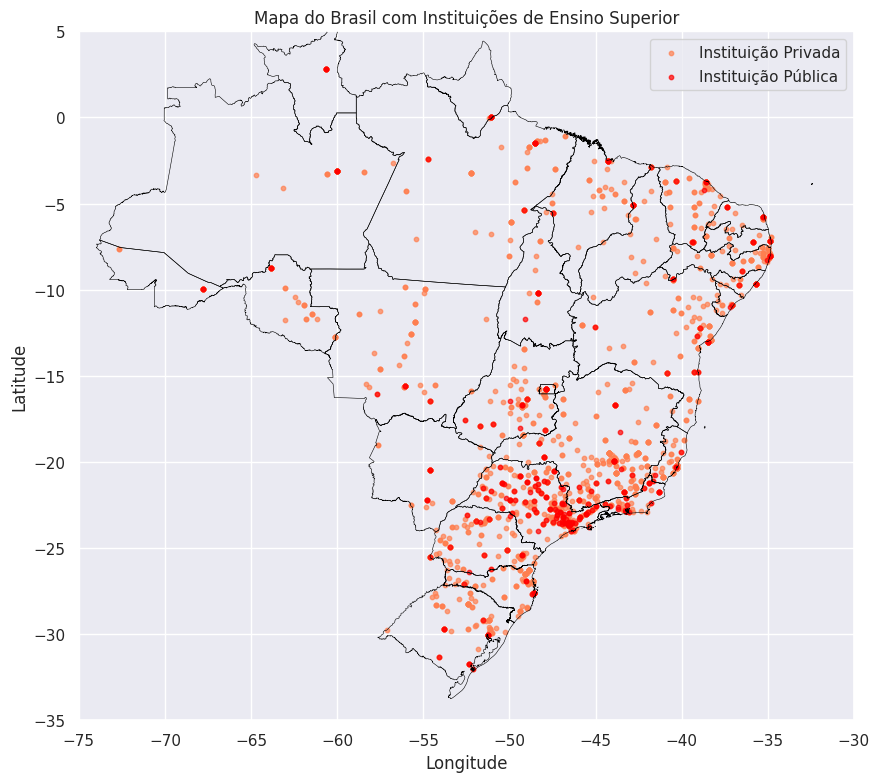

In [ ]:

states = geobr.read_state(code_state='all')

# Criação da figura e do eixo
fig, ax = plt.subplots(figsize=(10, 10))

# Plote os contornos dos estados
states.boundary.plot(ax=ax, linewidth=0.4, color='black')

# Plote os pontos das instituições públicas e privadas
ax.scatter(df_privada['LNG'], df_privada['LAT'], color='coral', label='Instituição Privada', s=10, alpha=0.7)
ax.scatter(df_publica['LNG'], df_publica['LAT'], color='red', label='Instituição Pública', s=10, alpha=0.7)

# Configurações do mapa
ax.set_xlim(-75, -30)  # Ajuste os limites do mapa de acordo com a localização desejada
ax.set_ylim(-35, 5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Mapa do Brasil com Instituições de Ensino Superior')
ax.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [getattr(geom, op, None) for geom in left.data]
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationW

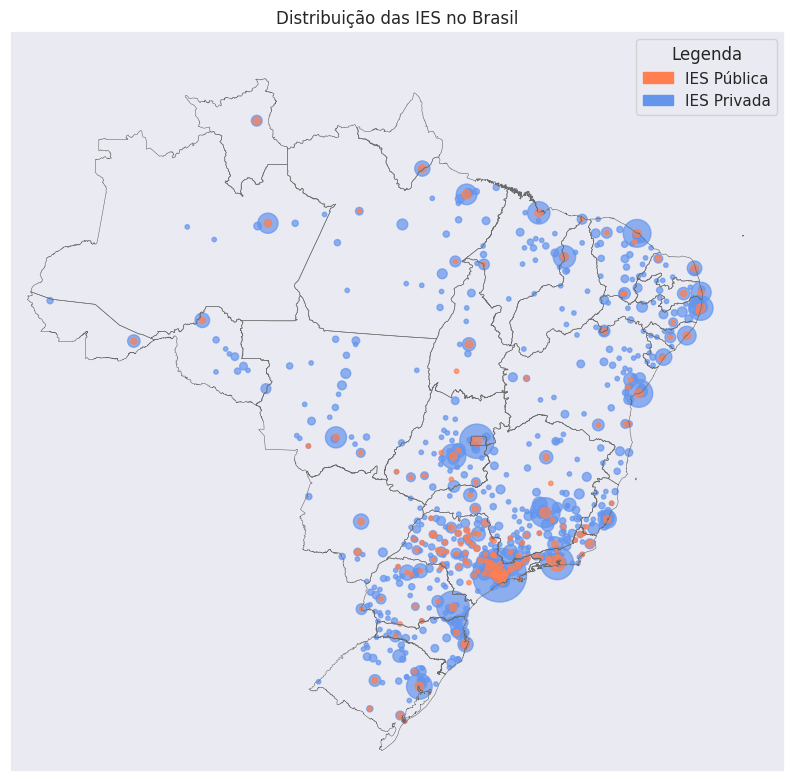

In [ ]:
# Carregando os contornos dos estados do Brasil usando a biblioteca geobr
states = geobr.read_state(code_state='all')

# contagem IES por cidade
df_publica_count = df_publica.groupby(['LAT', 'LNG']).size().reset_index(name='count')
df_privada_count = df_privada.groupby(['LAT', 'LNG']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 10))
states.boundary.plot(ax=ax, linewidth=0.4, color='dimgray')

gprivada = ax.scatter(df_privada_count['LNG'], df_privada_count['LAT'], color='cornflowerblue', label='Instituição Privada',
           s=df_privada_count['count'] * 10, alpha=0.7)
gpublica = ax.scatter(df_publica_count['LNG'], df_publica_count['LAT'], color='coral', label='Instituição Pública',
           s=df_publica_count['count'] * 10, alpha=0.7)

# Oculta as informações de latitude e longitude
ax.set_xticks([])
ax.set_yticks([])

# Configurações do mapa
ax.set_xlim(-75, -30)  # Ajuste os limites do mapa de acordo com a localização desejada
ax.set_ylim(-35, 8)
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')
ax.set_title('Distribuição das IES no Brasil')
#legenda
legend_elements = [Patch(color='coral', label='IES Pública'),
                  Patch(color='cornflowerblue', label='IES Privada')]
labels = ['IES Pública', 'IES Privada']

ax.legend(handles=legend_elements, labels=labels, title='Legenda', loc="upper right")

plt.show()

In [ ]:
#salvar a figura
with open('distribuicao_ies.pickle', 'wb') as file:
    pickle.dump(fig, file)

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [getattr(geom, op, None) for geom in left.data]
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationW

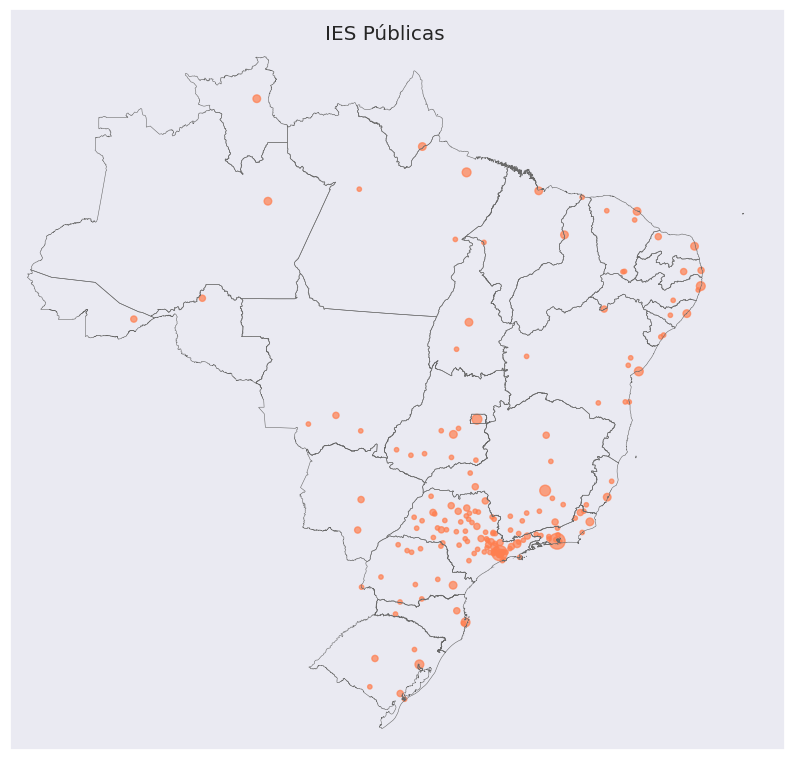

In [ ]:
#Apenas IES Publicas
# Carregando os contornos dos estados do Brasil usando a biblioteca geobr
states = geobr.read_state(code_state='all')

# contagem IES por cidade
df_publica_count = df_publica.groupby(['LAT', 'LNG']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 10))
states.boundary.plot(ax=ax, linewidth=0.4, color='dimgray')

gpublica = ax.scatter(df_publica_count['LNG'], df_publica_count['LAT'], color='coral', label='Instituição Pública',
           s=df_publica_count['count'] * 10, alpha=0.7)

# Oculta as informações de latitude e longitude
ax.set_xticks([])
ax.set_yticks([])

# Configurações do mapa
ax.set_xlim(-75, -30)  # Ajuste os limites do mapa de acordo com a localização desejada
ax.set_ylim(-35, 8)
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')

plt.suptitle('IES Públicas', x=0.5, y=0.85)

plt.show()

In [ ]:
#salvar a figura
with open('ies_publicas.pickle', 'wb') as file:
    pickle.dump(fig, file)

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:386: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [getattr(geom, op, None) for geom in left.data]
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:183: ShapelyDeprecationW

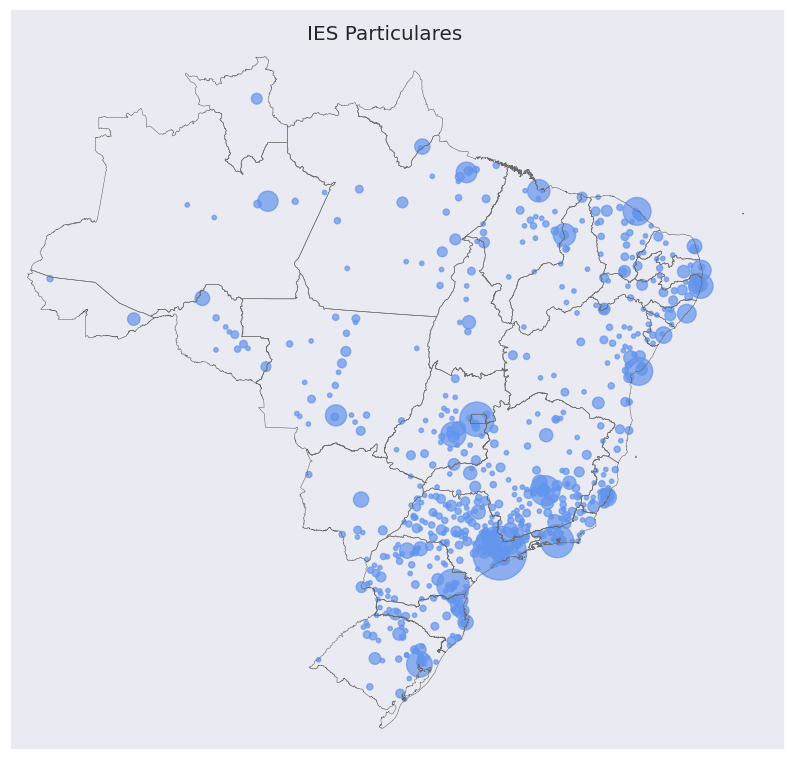

In [ ]:
#Apenas IES Particulares
states = geobr.read_state(code_state='all')

# contagem IES por cidade
df_privada_count = df_privada.groupby(['LAT', 'LNG']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 10))
states.boundary.plot(ax=ax, linewidth=0.4, color='dimgray')

gprivada = ax.scatter(df_privada_count['LNG'], df_privada_count['LAT'], color='cornflowerblue', label='Instituição Privada',
           s=df_privada_count['count'] * 10, alpha=0.7)

# Oculta as informações de latitude e longitude
ax.set_xticks([])
ax.set_yticks([])

# Configurações do mapa
ax.set_xlim(-75, -30)  # Ajuste os limites do mapa de acordo com a localização desejada
ax.set_ylim(-35, 8)
plt.suptitle('IES Particulares', x=0.5, y=0.85)

plt.show()

In [ ]:
#salvar a figura
with open('ies_particulares.pickle', 'wb') as file:
    pickle.dump(fig, file)

Tentando fazer o mapa interativo

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
# Crie um mapa inicial
m = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)  # Define a localização inicial e o nível de zoom

# Crie um cluster de marcadores para melhorar o desempenho
marker_cluster_publica = MarkerCluster().add_to(m)
marker_cluster_privada = MarkerCluster().add_to(m)




# Itere sobre as linhas dos DataFrames e adicione marcadores ao mapa
for index, row in df_publica.iterrows():
    if not pd.isna(row['SG_IES']):  # Verifique se 'SG_IES' não é NaN
        popup_content = f"Sigla: {row['SG_IES']}<br>Nome da Instituição: {row['NO_IES']}"
    else:
        popup_content = f"Nome da Instituição: {row['NO_IES']}"
    folium.Marker(
        location=[row['LAT'], row['LNG']],
        popup=popup_content,
    ).add_to(marker_cluster_publica)

for index, row in df_privada.iterrows():
    if not pd.isna(row['SG_IES']):  # Verifique se 'SG_IES' não é NaN
        popup_content = f"Sigla: {row['SG_IES']}<br>Nome da Instituição: {row['NO_IES']}"
    else:
        popup_content = f"Nome da Instituição: {row['NO_IES']}"
    folium.Marker(
        location=[row['LAT'], row['LNG']],
        popup=popup_content,
    ).add_to(marker_cluster_privada)

#for index, row in df_publica.iterrows():
#    popup_content = f"Nome da Instituição: {row['NO_IES']}<br>Sigla: {row['SG_IES']}"
#    folium.Marker(
#        location=[row['LAT'], row['LNG']],
#        popup=popup_content,
#    ).add_to(marker_cluster_publica)

#for index, row in df_privada.iterrows():
#    popup_content = f"Nome da Instituição: {row['NO_IES']}<br>Sigla: {row['SG_IES']}"
#    folium.Marker(
#        location=[row['LAT'], row['LNG']],
#        popup=popup_content,
#    ).add_to(marker_cluster_privada)

# Exiba o mapa interativo no notebook
m


In [ ]:
#salvar o mapa
m.save("ies_interativo.html")
#para carregar no streamlit:
#st.components.v1.iframe("./caminho/ies_interativo.html", height=600)

### Salvar dados IES com agregaçoes por Regiao em CSV

In [ ]:
# salvar em arquivo
#df2.to_csv('./dados/preparados/dados_IES_agg_Regiao.csv', sep='|', index=False)